In [ ]:
#@title Importing the libraries
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
device = torch.device('cpu')
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# Loading the data

Files already downloaded and verified
torch.Size([1000, 1, 32, 32]) torch.Size([1000]) <class 'torch.Tensor'>


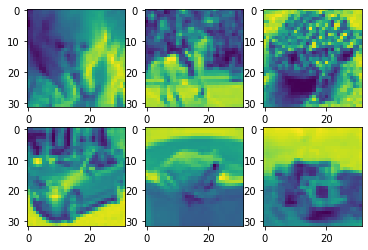

In [ ]:
#@title 
variable_name = ""
input_size = 1024 #32*32 
hidden_size = 10
num_classes= 10
num_epochs = 5
batch_size = 1000
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
#trans = transforms.Grayscale()
transform = transforms.Compose([transforms.Grayscale(num_output_channels=1), transforms.ToTensor(),
                    transforms.Normalize(mean=[0.5], std=[0.5])])
train_dataset = datasets.CIFAR10(root='./data' , train = True,
                                             transform=transform, download = True)
test_dataset = datasets.CIFAR10(root='./data', train=True,
                                            transform=transform, download=False)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size= batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = batch_size,
                                          shuffle=False)
data_samples, labels = next(iter(train_loader))
print(data_samples.shape, labels.shape, type(samples))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0])
  plt.show

train_size = len(train_dataset)
#print(train_size)
num_batches = (train_size//batch_size)+1
#print(num_batches)

# Defining Training and Testing Method

In [ ]:
#define leanrning while calling
def train_method(model,lr):
  test_loss, correct = 0, 0
  for i,(images,labels) in enumerate(train_loader):
    #images = trans(images)
    images = images.reshape(-1, 32*32).to(device)
    labels = labels.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr)
    #forward
    outputs = model(images)
    loss = criterion(outputs, labels)
    test_loss += loss.item()
    correct += ((outputs.argmax(1) == labels).type(torch.float).sum().item()/batch_size)
    
    #backward
    optimizer.zero_grad()
    loss.backward()
    # for j in model.parameters():
    #   print(j.grad)
    optimizer.step()
    # if (i+1)%100 == 0:
    #   print(f"Batch Number: {i+1} , Test Error: \n Accuracy: {(correct/train_size)*100:>0.1f}%, Avg loss: {(test_loss/num_batches)*100:>8f} \n")
    # if (i+1)%(50000/batch_size) == 0:
    #   print(f"epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps},loss = {loss.item():.4f}")
    #   loss_val.append(loss.item())
  
  # print(f" batch is {i}, total loss is {test_loss}")
  # print(f" batch is {i}, total accuracy is {accuracy}")
  test_loss /= num_batches
  correct /= num_batches
  return correct, test_loss

def test_method(model):
  with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
      #images = trans(images)
      images = images.reshape(-1, 32*32).to(device)
      labels = labels.to(device)
      outputs = model(images)
      # print(f"outputs are : {outputs}")
      # print(f"labels are : {labels}")
      #value, index
      _, predictions = torch.max(outputs,1)
      n_samples += labels.shape[0]
      n_correct += (predictions == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'accuracy = {acc}')
  return acc

# 3 Layer Network with Sigmoid Activation


epoch is 1
 loss is 2.294
epoch is 2
 loss is 2.262
epoch is 3
 loss is 2.257
epoch is 4
 loss is 2.256
epoch is 5
 loss is 2.255
epoch is 6
 loss is 2.254
epoch is 7
 loss is 2.253
epoch is 8
 loss is 2.253
[1, 2, 3, 4, 5, 6, 7, 8]


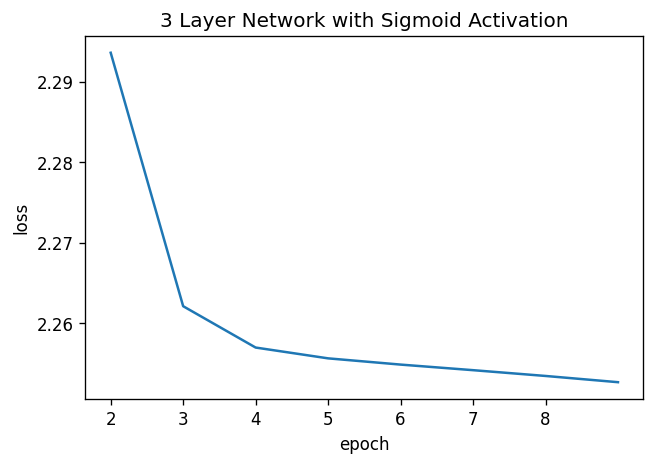

In [ ]:
num_epochs = 8
loss_val = []
x_line = []
class Sigmoid_3(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Sigmoid_3, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.sigmoid = nn.Sigmoid()
    self.l2 = nn.Linear(hidden_size,hidden_size)
    #self.softmax = nn.Softmax(dim=1)
    self.l3 = nn.Linear(hidden_size, num_classes)
  def forward(self , x):
    out = self.l1(x)
    out = self.sigmoid(out)
    out = self.l2(out)
    out = self.sigmoid(out)
    out = self.l3(out)
    return out

model_sigmoid_3 = Sigmoid_3(input_size, hidden_size, num_classes).to(device)
for epoch in range(num_epochs):
  print(f"epoch is {epoch+1}")
  accuracy, loss = train_method(model_sigmoid_3,0.05)
  print(f" loss is {loss:.3f}")
  loss_val.append(loss)
my_xticks = []
for i in range(len(loss_val)):
  my_xticks.append(i+1)
print(my_xticks)
plt.figure(1,dpi=120)
plt.title("3 Layer Network with Sigmoid Activation")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.xscale("linear")
plt.yscale("linear")
x = np.array(np.arange(0, len(my_xticks), 1))
plt.xticks(x, my_xticks)
plt.plot(my_xticks,loss_val)

# 3 Layer network with Tanh Activation Function

epoch is 1
 loss is 2.187
epoch is 2
 loss is 2.121
epoch is 3
 loss is 2.086
epoch is 4
 loss is 2.059
epoch is 5
 loss is 2.036
epoch is 6
 loss is 2.018
epoch is 7
 loss is 2.003
epoch is 8
 loss is 1.992
[1, 2, 3, 4, 5, 6, 7, 8]


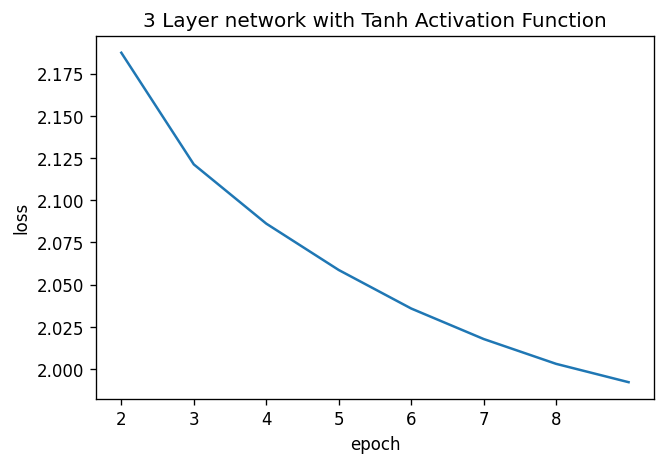

In [ ]:
num_epochs = 8
loss_val = []
x_line = []
class Tanh_3(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Tanh_3, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.tanh = nn.Tanh()
    self.l2 = nn.Linear(hidden_size,hidden_size)
    #self.softmax = nn.Softmax(dim=1)
    self.l3 = nn.Linear(hidden_size, num_classes)
  def forward(self , x):
    out = self.l1(x)
    out = self.tanh(out)
    out = self.l2(out)
    out = self.tanh(out)
    out = self.l3(out)
    return out

model_tanh_3 = Tanh_3(input_size, hidden_size, num_classes).to(device)
for epoch in range(num_epochs):
  print(f"epoch is {epoch+1}")
  accuracy, loss = train_method(model_tanh_3,0.1)
  print(f" loss is {loss:.3f}")
  loss_val.append(loss)
my_xticks = []
for i in range(len(loss_val)):
  my_xticks.append(i+1)
print(my_xticks)
plt.figure(1,dpi=120)
plt.title("3 Layer network with Tanh Activation Function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.xscale("linear")
plt.yscale("linear")
x = np.array(np.arange(0, len(my_xticks), 1))
plt.xticks(x, my_xticks)
plt.plot(my_xticks,loss_val)

# 5 Layer Network with Sigmoid Activation to show Vanishing Gradient Problem

epoch is 1
 loss is 2.270
epoch is 2
 loss is 2.258
epoch is 3
 loss is 2.257
epoch is 4
 loss is 2.257
epoch is 5
 loss is 2.257
epoch is 6
 loss is 2.257
epoch is 7
 loss is 2.257
epoch is 8
 loss is 2.257
[1, 2, 3, 4, 5, 6, 7, 8]


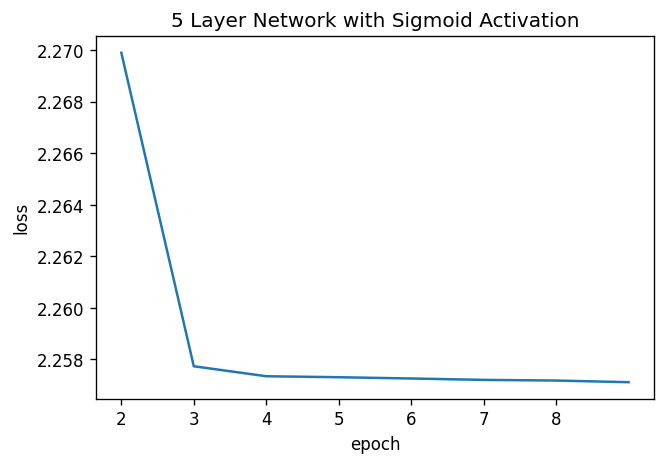

In [ ]:
num_epochs = 8
loss_val = []
x_line = []
class Sigmoid_5(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Sigmoid_5, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.sigmoid = nn.Sigmoid()
    self.l2 = nn.Linear(hidden_size,hidden_size)
    self.l3 = nn.Linear(hidden_size,hidden_size)
    self.l4 = nn.Linear(hidden_size,hidden_size)
    # self.l5 = nn.Linear(hidden_size,hidden_size)
    # self.l6 = nn.Linear(hidden_size,hidden_size)
    # self.l7 = nn.Linear(hidden_size,hidden_size)
    # self.l8 = nn.Linear(hidden_size,hidden_size)
    # self.l9 = nn.Linear(hidden_size,hidden_size)
    # self.l10 = nn.Linear(hidden_size,hidden_size)
    # self.l11 = nn.Linear(hidden_size,hidden_size)
    #self.softmax = nn.Softmax(dim=1)
    self.l12 = nn.Linear(hidden_size, num_classes)
  def forward(self , x):
    out = self.l1(x)
    out = self.sigmoid(out)
    out = self.l2(out)
    out = self.sigmoid(out)
    out = self.l3(out)
    out = self.sigmoid(out)
    out = self.l4(out)
    out = self.sigmoid(out)
    # out = self.l5(out)
    # out = self.sigmoid(out)
    # out = self.l6(out)
    # out = self.sigmoid(out)
    # out = self.l7(out)
    # out = self.sigmoid(out)
    # out = self.l8(out)
    # out = self.sigmoid(out)
    # out = self.l9(out)
    # out = self.sigmoid(out)
    # out = self.l10(out)
    # out = self.sigmoid(out)
    # out = self.l11(out)
    # out = self.sigmoid(out)
    out = self.l12(out)
    return out

model_sigmoid_5 = Sigmoid_5(input_size, hidden_size, num_classes).to(device)
for epoch in range(num_epochs):
  print(f"epoch is {epoch+1}")
  accuracy, loss = train_method(model_sigmoid_5,0.1)
  print(f" loss is {loss:.3f}")
  loss_val.append(loss)
my_xticks = []
for i in range(len(loss_val)):
  my_xticks.append(i+1)
print(my_xticks)
plt.figure(1,dpi=120)
plt.title("4 Layer Network with Sigmoid Activation")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.xscale("linear")
plt.yscale("linear")
x = np.array(np.arange(0, len(my_xticks), 1))
plt.xticks(x, my_xticks)
plt.plot(my_xticks,loss_val)

# 5 Layer Network with ReLU Activation Function to Solve Vanishing Gradient Problem

epoch is 1
 loss is 2.262
epoch is 2
 loss is 2.257
epoch is 3
 loss is 2.255
epoch is 4
 loss is 2.253
epoch is 5
 loss is 2.250
epoch is 6
 loss is 2.245
epoch is 7
 loss is 2.237
epoch is 8
 loss is 2.228
[1, 2, 3, 4, 5, 6, 7, 8]


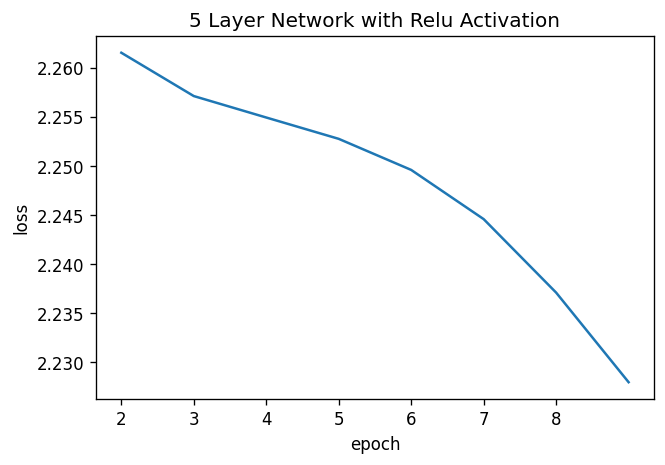

In [ ]:
num_epochs = 8
loss_val = []
x_line = []
class Relu_5(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Relu_5, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,hidden_size)
    self.l3 = nn.Linear(hidden_size,hidden_size)
    self.l4 = nn.Linear(hidden_size,hidden_size)
    #self.softmax = nn.Softmax(dim=1)
    self.l5 = nn.Linear(hidden_size, num_classes)
  def forward(self , x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    out = self.relu(out)
    out = self.l3(out)
    out = self.relu(out)
    out = self.l4(out)
    out = self.relu(out)
    out = self.l5(out)
    return out

model_relu_5 = Relu_5(input_size, hidden_size, num_classes).to(device)
for epoch in range(num_epochs):
  print(f"epoch is {epoch+1}")
  accuracy, loss = train_method(model_relu_5,0.1)
  print(f" loss is {loss:.3f}")
  loss_val.append(loss)
my_xticks = []
for i in range(len(loss_val)):
  my_xticks.append(i+1)
print(my_xticks)
plt.figure(1,dpi=120)
plt.title("5 Layer Network with Relu Activation")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.xscale("linear")
plt.yscale("linear")
x = np.array(np.arange(0, len(my_xticks), 1))
plt.xticks(x, my_xticks)
plt.plot(my_xticks,loss_val)